<H1>DS 7331 Lab 2 Classification Fall 2023</H1>

<H3>Team Members: Jae Chung, Matthew David, Nick Mueller, Alex Thibeaux</H3>
<br>
<H2>Kaggle Diabetes Dataset</H2>
<H4> Libraries Used: </H4>

In [2]:
# Libraries
import numpy as np
import pandas as pd
import opendatasets as od # Loading in Kaggle Datasets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

<H2> Data Preperation </H2>


In [3]:

# Define the file path
file_path = r'C:\Users\matth\Machine Learning\Proj1\preclean.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Randomly sample 15,000 rows when diabetes_binary is "0"
data1_0 = df[df['Diabetes_binary'] == 0].sample(n=15000, random_state=42)

# Randomly sample 15,000 rows when diabetes_binary is "1"
data1_1 = df[df['Diabetes_binary'] == 1].sample(n=15000, random_state=42)

# Concatenate the two sampled DataFrames into data1
data1 = pd.concat([data1_0, data1_1])

# Reset the index of the new DataFrame
data1.reset_index(drop=True, inplace=True)

# Display the first few rows of data1
data1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,5.0,0.0,0.0,4.0,6.0,7.0
1,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,5.0
2,0.0,1.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,3.0,2.0,0.0,0.0,2.0,6.0,8.0
3,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,3.0,5.0,1.0,1.0,13.0,6.0,1.0
4,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,13.0,5.0,6.0


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       30000 non-null  float64
 1   HighBP                30000 non-null  float64
 2   HighChol              30000 non-null  float64
 3   CholCheck             30000 non-null  float64
 4   BMI                   30000 non-null  float64
 5   Smoker                30000 non-null  float64
 6   Stroke                30000 non-null  float64
 7   HeartDiseaseorAttack  30000 non-null  float64
 8   PhysActivity          30000 non-null  float64
 9   Fruits                30000 non-null  float64
 10  Veggies               30000 non-null  float64
 11  HvyAlcoholConsump     30000 non-null  float64
 12  AnyHealthcare         30000 non-null  float64
 13  NoDocbcCost           30000 non-null  float64
 14  GenHlth               30000 non-null  float64
 15  MentHlth           

<H4> Checking for Outliers in BMI </H4>

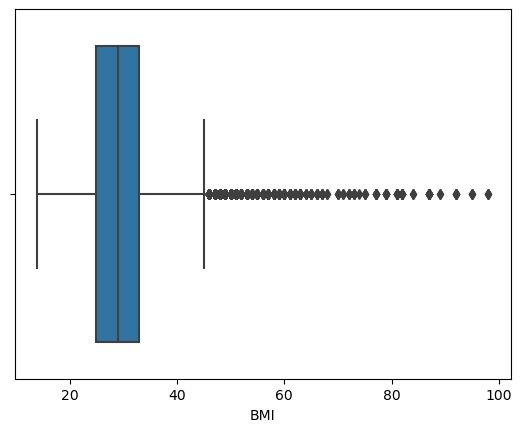

In [6]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1['BMI'])
plt.show()

<H4> Assesment </H4>

When examining the BMI distribution, it becomes apparent that there are several outliers beyond the third quartile, along with unusually high BMI values that surpass the typical range of 18-40. Before considering the removal of these outliers, let's explore the logged variable to determine if it resolves this issue.

In [7]:
data1['BMI_transformed'] = np.log(data1['BMI'])

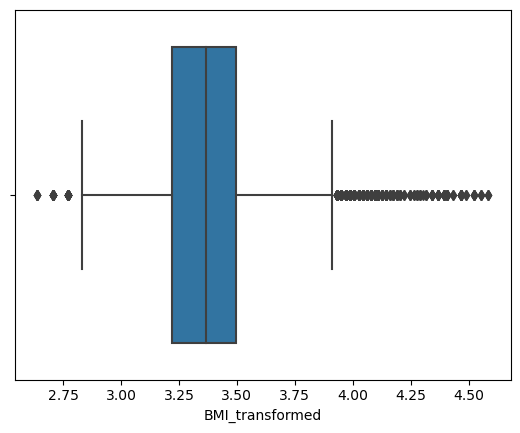

In [8]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1['BMI_transformed'])
plt.show()

Here, we observe that even after applying a logarithmic transformation to BMI, there are still numerous outliers, including some below the first quartile. As a result, we will proceed by removing these outliers

In [9]:
# Drop the transformed BMI column
data1 = data1.drop(columns=['BMI_transformed'])

In [10]:
# Calculate IQR for BMI
Q1 = data1['BMI'].quantile(0.25)
Q3 = data1['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (data1['BMI'] < lower_bound) | (data1['BMI'] > upper_bound)

#remove outliers from the DataFrame
data1_cleaned = data1[~outliers]

# Print the identified outliers
print("Outliers:")
print(data1[outliers])

Outliers:
       Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
57                 0.0     1.0       1.0        1.0  87.0     1.0     0.0   
73                 0.0     0.0       0.0        1.0  49.0     0.0     0.0   
115                0.0     1.0       1.0        1.0  55.0     0.0     0.0   
166                0.0     0.0       0.0        1.0  50.0     0.0     0.0   
310                0.0     0.0       1.0        1.0  57.0     0.0     0.0   
...                ...     ...       ...        ...   ...     ...     ...   
29922              1.0     1.0       0.0        1.0  50.0     0.0     0.0   
29926              1.0     1.0       1.0        1.0  55.0     0.0     1.0   
29969              1.0     0.0       1.0        1.0  46.0     0.0     0.0   
29971              1.0     0.0       1.0        1.0  84.0     0.0     0.0   
29984              1.0     1.0       1.0        1.0  64.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealth

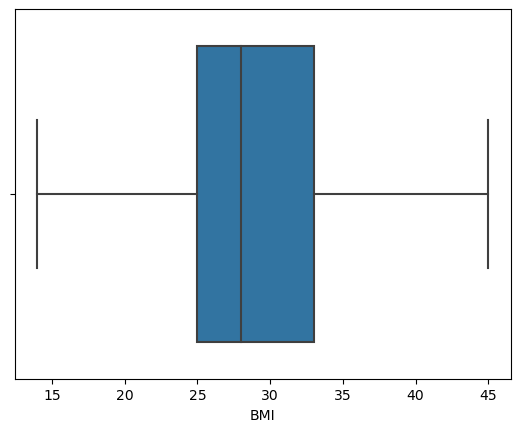

In [11]:
# Box plot to visualize potential outliers
sns.boxplot(x=data1_cleaned['BMI'])
plt.show()

In this boxplot, it is evident that after the removal of outliers, all the remaining values are now contained within the Interquartile Range (IQR).

<H4> Fixing the other variables </H4> 

4 other features are currently ordinal for the purpose of this analysis we will utilize one hot encoding and to prepare these variables for  Logistig and SVM. We are utilizing these codebooks to decide how to divide these features

https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook

https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

<H4>One Hot Encoding </H4>


In [12]:
# One-hot encode categorical variables
data1_encoded = pd.get_dummies(data1_cleaned, columns=['GenHlth', 'Education', 'Income','Age'])

In [13]:
data1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       29062 non-null  float64
 1   HighBP                29062 non-null  float64
 2   HighChol              29062 non-null  float64
 3   CholCheck             29062 non-null  float64
 4   BMI                   29062 non-null  float64
 5   Smoker                29062 non-null  float64
 6   Stroke                29062 non-null  float64
 7   HeartDiseaseorAttack  29062 non-null  float64
 8   PhysActivity          29062 non-null  float64
 9   Fruits                29062 non-null  float64
 10  Veggies               29062 non-null  float64
 11  HvyAlcoholConsump     29062 non-null  float64
 12  AnyHealthcare         29062 non-null  float64
 13  NoDocbcCost           29062 non-null  float64
 14  MentHlth              29062 non-null  float64
 15  PhysHlth              29

We can observe that when we call 'data1_encoded.info()', the variables have been expanded using one-hot encoding. Notably, the "age" variable has been split into 13 different variables. We will now proceed to determine the corresponding range for each new variable and correctly label them.

<H4> Renaming features </H4>

In [14]:
data1_encoded.rename(columns={
    'Income_1.0': 'Income Less than $10,000',
    'Income_2.0': 'Income $10,000 - $14,999',
    'Income_3.0': 'Income $15,000 - $19,999',
    'Income_4.0': 'Income $20,000 - $24,999',
    'Income_5.0': 'Income $25,000 - $34,999',
    'Income_6.0': 'Income $35,000 - $49,999',
    'Income_7.0': 'Income $50,000 - $74,999',
    'Income_8.0': 'Income $75,000 or more',
    'Education_1.0': 'No Formal Education',
    'Education_2.0': 'Elementary School',
    'Education_3.0': 'Some High School',
    'Education_4.0': 'High School Graduate',
    'Education_5.0': 'Some College or Technical School',
    'Education_6.0': 'College or Technical School Graduate',
    'GenHlth_1.0': 'GenHlth_Excellent',
    'GenHlth_2.0': 'GenHlth_VeryGood',
    'GenHlth_3.0': 'GenHlth_Good',
    'GenHlth_4.0': 'GenHlth_Fair',
    'GenHlth_5.0': 'GenHlth_Poor',
    'Sex': 'IsMale',
    'Age_1.0': 'Age_18-24',
    'Age_2.0': 'Age_25-29',
    'Age_3.0': 'Age_30-34',
    'Age_4.0': 'Age_35-39',
    'Age_5.0': 'Age_40-44',
    'Age_6.0': 'Age_45-49',
    'Age_7.0': 'Age_50-54',
    'Age_8.0': 'Age_55-59',
    'Age_9.0': 'Age_60-64',
    'Age_10.0': 'Age_65-69',
    'Age_11.0': 'Age_70-74',
    'Age_12.0': 'Age_75-79',
    'Age_13.0': 'Age_80+',
    
    # Add more renaming as needed
}, inplace=True)

This code chunk replaces the automatically generated variable names from a one-hot encoder with new, more descriptive names that enable better interpretation when we begin examining the weights. All names were the corresponding values based on the study conducted in 2015 https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

In [15]:
data1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29062 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Diabetes_binary                       29062 non-null  float64
 1   HighBP                                29062 non-null  float64
 2   HighChol                              29062 non-null  float64
 3   CholCheck                             29062 non-null  float64
 4   BMI                                   29062 non-null  float64
 5   Smoker                                29062 non-null  float64
 6   Stroke                                29062 non-null  float64
 7   HeartDiseaseorAttack                  29062 non-null  float64
 8   PhysActivity                          29062 non-null  float64
 9   Fruits                                29062 non-null  float64
 10  Veggies                               29062 non-null  float64
 11  HvyAlcoholConsump   

<H4> Checking for Multicolinearity </H4>

<Axes: >

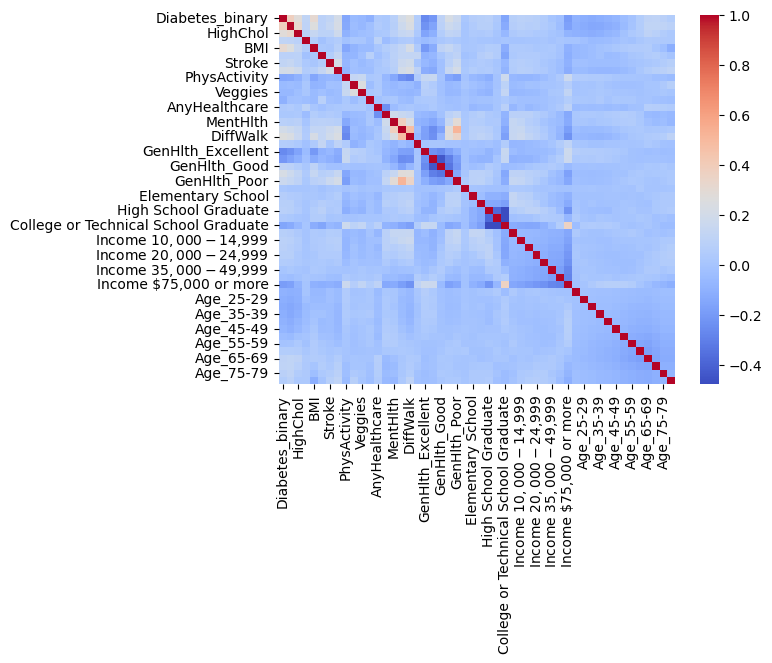

In [16]:
# Calculate the correlation matrix
correlation_matrix = data1_encoded.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

Upon examining the correlation matrix, it's evident that our dataset exhibits low multicollinearity, which is particularly advantageous for our analysis. Given that techniques such as grid search and many predictive models are sensitive to multicollinearity, its minimal presence in our dataset augments the robustness and reliability of our subsequent analyses. This positions us well for a more confident interpretation of the model's results and any parameter tuning using grid search.

<H3> The Final Dataset (new name) 5PTS </H3>

Before diving into our machine learning experiment, it was essential to ensure that our dataset was in optimal condition. The process of data preparation involved multiple critical steps to address outliers, balance the dataset, and encode categorical features appropriately.

<H4>Outlier Detection and Data Balancing</H4>
To begin, we conducted a thorough examination for outliers within the dataset. Particular attention was given to variables that had the potential to significantly affect our results. One area that stood out was the Body Mass Index (BMI), a metric known for its potential to skew results if outliers are not managed effectively.

Further, we recognized the importance of data balance in our analysis. To ensure unbiased results, we took steps to balance the dataset by equalizing the number of positive and negative responses. By dividing the dataset into 15,000 positive (prediabetic/diabetic) and negative(Non Diabetic) responses, we created a balanced dataset that would allow our machine learning model to perform optimally at discriminating between the classes of our response variable.

<H4>Handling Outliers in BMI</H4>

Our examination of BMI uncovered several outliers that needed to be addressed. These outliers had the potential to distort the overall distribution of the data and, in turn, affect the model's accuracy. To manage this, we employed the Interquartile Range (IQR) method to detect and remove outliers within the BMI variable. This approach ensured that our dataset accurately represented the population without the influence of extreme values.


<H4>Ordinal Variables Encoding </H4>

In our dataset, we encountered four ordinal variables (GenHlth, AGE, Education, and Income). This presents a potential challenge because machine learning algorithms might misinterpret these variables, treating them as purely numerical values. Such misinterpretation can lead to inaccurate inferences. For instance, these algorithms could mistakenly infer that '4' is greater than '1' when applied to General Health, Education, and Income, potentially impacting the accuracy of our variable analysis.

Additionally, we examined the variables phyhealth and menthlth as potential candidates for encoding. However, upon referring to the data source (https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf), we discovered that these variables represent the number of days in the last 30 during which individuals experienced issues related to their physical or mental health, respectively. Consequently, these variables were appropriately encoded as numeric responses.

<H4> New variables</H4> 


<H5>Gender</H5>

Converted the gender variable to: Ismale 



<H5>Income </H5>

After one-hot encoding, our Income variable was transformed into eight binary variables, each representing a different income range

Income Less than 10,000

Income 10,000 - 14,999

Income 15,000 - 19,999

Income 20,000 - 24,999

Income 25,000 - 34,999

Income 35,000 - 49,999

Income 50,000 - 74,999

Income 75,000 or more

These new binary variables capture whether an individual's income falls within a particular income range, providing a more granular representation of income levels in our dataset." 

<H5>Age </H5>

After further data processing, we have transformed our Age variable into thirteen binary variables, each indicating a different age group:

Age_18-24:This variable is 'True' if the individual's age falls within the 18-24 age group.

Age_25-29:This variable is 'True' if the individual's age falls within the 25-29 age group.

Age_30-34:This variable is 'True' if the individual's age falls within the 30-34 age group.

Age_35-39:This variable is 'True' if the individual's age falls within the 35-39 age group.

Age_40-44: This variable is 'True' if the individual's age falls within the 40-44 age group.

Age_45-49: This variable is 'True' if the individual's age falls within the 45-49 age group.

Age_50-54: This variable is 'True' if the individual's age falls within the 50-54 age group.

Age_55-59: This variable is 'True' if the individual's age falls within the 55-59 age group.

Age_60-64:This variable is 'True' if the individual's age falls within the 60-64 age group.

Age_65-69:This variable is 'True' if the individual's age falls within the 65-69 age group.

Age_70-74: This variable is 'True' if the individual's age falls within the 70-74 age group.

Age_75-79:This variable is 'True' if the individual's age falls within the 75-79 age group.

Age_80+: This variable is 'True' if the individual's age is 80 years or older.

These binary variables help segment the dataset into distinct age groups, making it easier to analyze and understand age-related trends and patterns.

<H5> Education </H5> 

After further data preprocessing, we have converted our Education variable into six binary variables, each representing a different education level:

No Formal Education: This variable is 'True' if the individual has no formal education.

Elementary School: This variable is 'True' if the individual has completed elementary school.

Some High School: This variable is 'True' if the individual has completed some high school education.

High School Graduate: This variable is 'True' if the individual has graduated from high school.

Some College or Technical School: This variable is 'True' if the individual has attended some college or technical school.

College or Technical School Graduate: This variable is 'True' if the individual has graduated from college or technical school.

These binary variables allow us to categorize individuals based on their educational attainment, making it easier to analyze the impact of education on various aspects of our dataset

<H5> GenHlth </H5>

After further data transformation, our General Health variable has been encoded into five binary variables, each representing a different level of general health:

GenHlth_Excellent: This variable is 'True' if the individual's self-reported general health is excellent.

GenHlth_VeryGood: This variable is 'True' if the individual's self-reported general health is very good.

GenHlth_Good: This variable is 'True' if the individual's self-reported general health is good.

GenHlth_Fair: This variable is 'True' if the individual's self-reported general health is fair.

GenHlth_Poor: This variable is 'True' if the individual's self-reported general health is poor.

These binary variables enable us to categorize individuals based on their self-perceived general health, facilitating the analysis of health-related trends and outcomes within our dataset

<H4> Data Scaling Strategy </H4> 

As we progressed with our dataset preparation, the decision was made to defer data scaling until a later stage in the pipeline. This strategic approach was chosen to uphold the separation of our training and test sets, preserving a realistic reflection of real-world scenarios. By waiting to scale the data post-split, we minimized the risk of data leakage and ensured that the training and test sets remained entirely distinct. This approach aligns with best practices in machine learning and maintains the integrity of our evaluation process.


<H4> Conclusion of our final dataset </H4>

Distribution of the response class:
 Diabetes_binary
0.0    14773
1.0    14289
Name: count, dtype: int64


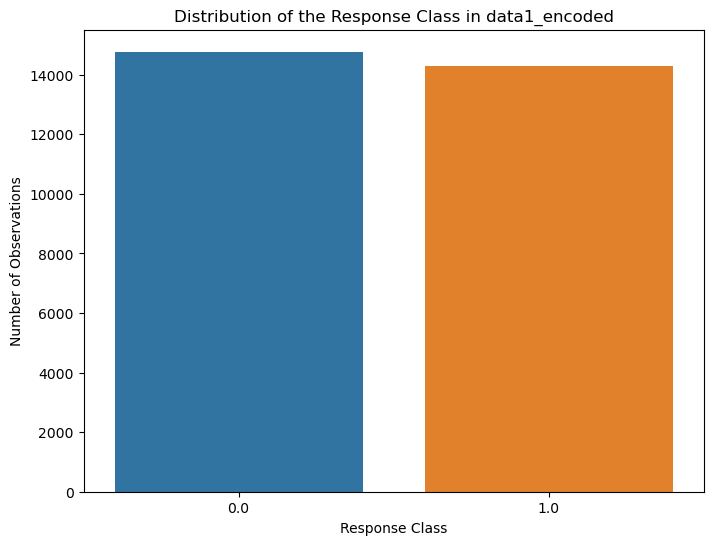

Total number of observations in the cleaned dataset: 29062


In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get the distribution of the response class
response_counts = data1_encoded['Diabetes_binary'].value_counts()

# Display the distribution
print("Distribution of the response class:\n", response_counts)

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_binary', data=data1_encoded)
plt.title("Distribution of the Response Class in data1_encoded")
plt.ylabel("Number of Observations")
plt.xlabel("Response Class")
plt.show()

# Get and print the total number of observations
total_observations = len(data1_encoded)
print(f"Total number of observations in the cleaned dataset: {total_observations}")


Our dataset underwent methodical refinement to optimize it for advanced classification and regression analyses. Outliers, notably within the Body Mass Index (BMI) metric, were addressed using the Interquartile Range (IQR) method, ensuring the dataset's distributions weren't skewed by extremities.

Substantial transformations included one-hot encoding for ordinal variables, resulting in binary variables that delineate distinct categories within Income, Age, Education, and GenHlth. This procedure ensured precision and clarity in the dataset, preventing potential misconstrual by algorithmic models.

With a total of 29,069 observations, the target variable Diabetes_binary presents a balanced distribution: 14,779 instances for class 0 and 14,290 for class 1. This balance enhances model training fidelity, ensuring unbiased, robust outcomes in subsequent analyses.

<H2>Modeling and Evaluation (70 points total) </H2>

<H3> Evaluation Metrics </H3>

<H4> Recall </H4>
In healthcare, particularly when diagnosing critical conditions like diabetes, ensuring that true cases are not overlooked is paramount. This makes recall a crucial metric, as it quantifies the model's ability to correctly identify all individuals with the condition. A high recall ensures that a minimal number of diabetes cases go undetected, even if it means some false positives. However, solely relying on recall might not provide a comprehensive evaluation, as it doesn't consider the false positive rate. 

<H4> AUROC </H4>
This is where the AUROC comes into play. The AUROC evaluates a model's ability to discriminate between the positive class (individuals with diabetes) and the negative class across different threshold values. A model with an AUROC score close to 1 indicates an excellent distinction between the two classes, thus complementing the recall metric. By combining both recall and AUROC, we can ensure that our models not only captures most of the true positive cases but also maintains a reasonable balance in distinguishing between the classes, making these metrics highly appropriate for the diabetes dataset.

<H3> Splitting our Data </H3>

Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. ( ADD SCALING HERE)

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

if 'Diabetes_binary' in data1_encoded:
    y = data1_encoded['Diabetes_binary'].values  # Get the feature we are predicting
    del data1_encoded['Diabetes_binary']  # Get rid of the class label
    X = data1_encoded.values  # Use everything else to predict!

# Set up cross-validation and training-test split
random_seed = 42  # Setting a random seed for reproducibility

num_folds = 10
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create a StandardScaler for feature scaling
scaler = StandardScaler()

# Lists to store cross-validation scores for different models
cross_val_scores_lr = []
cross_val_scores_knn = []
cross_val_scores_rf = []

# Make lists to store refit cross-validatre scores

cross_val_scores_lr2 = []
cross_val_scores_knn2 = []
cross_val_scores_rf2 = []

In the code above we set up a 10 fold CV due to its ability to utilize a bias and variance trade off and assist with better generalizations. By using multiple folds, we are able to reduce bias because we are using a larger portion of the dataset in multiple ways, whereas we might also increase variance due to different train-test splits. We also added the "StandardScaler" function from scikit-learn so that all features can be on the same scale, this can be beneficial becuase many machine learning algorithms are sensitive to the scales of different features. For example, our KNN model predicts classes based on distance between data points, therefore, features with larger scales dominate the decision making. The StandardScaler ensures that all features are weighed the same so that we can improve accuracy and efficiency.

<H3> Fit And Tune Models </H3>

<H4>Fit Initial models</H4>

In [19]:
# Perform stratified 10-fold cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the data based on the training set and apply the same scaling to the test set
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit the Logistic Regression model
    lr = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear')
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    recall_lr = recall_score(y_test, y_pred_lr)
    cross_val_scores_lr.append(recall_lr)

    # Initialize and fit the K-Nearest Neighbors (KNN) model
    knn = KNeighborsClassifier(n_neighbors=5)  # 
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    recall_knn = recall_score(y_test, y_pred_knn)
    cross_val_scores_knn.append(recall_knn)

    # Initialize and fit the Random Forest model
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    recall_rf = recall_score(y_test, y_pred_rf)
    cross_val_scores_rf.append(recall_rf)

<H4> Logistic Regression Recall Scores </H4>

In [22]:
print("Cross-Validation Recall Scores (Logistic Regression):", cross_val_scores_lr)

Cross-Validation Recall Scores (Logistic Regression): [0.768369489153254, 0.7893631910426872, 0.7745098039215687, 0.7501749475157453, 0.7522743177046886, 0.7669699090272918, 0.7634709587123862, 0.7858642407277817, 0.7823652904128762, 0.7571728481455563]


<H4>K-Nearest Neighbors Recall Scores</H4>

In [23]:
print("Cross-Validation Recall Scores (K-Nearest Neighbors):", cross_val_scores_knn)

Cross-Validation Recall Scores (K-Nearest Neighbors): [0.7102869139258222, 0.7200839748075577, 0.7072829131652661, 0.7004898530440867, 0.7200839748075577, 0.7039888033589923, 0.7165850244926522, 0.7207837648705389, 0.7326801959412176, 0.7137858642407278]


<H4> Random Forest Recall Scores </H4>

In [24]:
print("Cross-Validation Recall Scores (Random Forest):", cross_val_scores_rf)

Cross-Validation Recall Scores (Random Forest): [0.768369489153254, 0.787963610916725, 0.7836134453781513, 0.7494751574527642, 0.7571728481455563, 0.7662701189643107, 0.7711686494051785, 0.7830650804758572, 0.7872638208537439, 0.7669699090272918]


<H3> Adjust Model Parameters </H3>

In [30]:
from sklearn.model_selection import GridSearchCV

# Perform hyperparameter tuning for Logistic Regression
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=2000),
                               param_grid=param_grid_lr, cv=5, scoring='recall')
grid_search_lr.fit(X_train_scaled, y_train)
best_params_lr = grid_search_lr.best_params_

print("Best Parameters for Logistic Regression:")
print(best_params_lr)

# Perform hyperparameter tuning for K-Nearest Neighbors
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train_scaled, y_train)
best_params_knn = grid_search_knn.best_params_

print("Best Parameters for K-Nearest Neighbors:")
print(best_params_knn)

# Perform hyperparameter tuning for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_

print("Best Parameters for Random Forest:")
print(best_params_rf)


Best Parameters for Logistic Regression:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Parameters for K-Nearest Neighbors:
{'n_neighbors': 7}
Best Parameters for Random Forest:
{'max_depth': 20, 'n_estimators': 200}


<H4> Refit Models </H4>

In [20]:
# Loop through cross-validation and evaluate each model
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Scale the data based on the training set and apply the same scaling to the test set
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit the Logistic Regression model with the best hyperparameters
    lr = LogisticRegression(penalty='l1', C=0.1, class_weight=None, solver='liblinear')
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)
    recall_lr = recall_score(y_test, y_pred_lr)
    cross_val_scores_lr2.append(recall_lr)

    # Initialize and fit the K-Nearest Neighbors (KNN) model with the best hyperparameters
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    recall_knn = recall_score(y_test, y_pred_knn)
    cross_val_scores_knn2.append(recall_knn)

    # Initialize and fit the Random Forest model with the best hyperparameters
    rf = RandomForestClassifier(max_depth=20,n_estimators=200)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    recall_rf = recall_score(y_test, y_pred_rf)
    cross_val_scores_rf2.append(recall_rf)

In [20]:
# Now, you have recall scores for all three models for each fold
print("Cross-Validation Recall Scores (Logistic Regression):", cross_val_scores_lr2)
print("Cross-Validation Recall Scores (K-Nearest Neighbors):", cross_val_scores_knn2)
print("Cross-Validation Recall Scores (Random Forest):", cross_val_scores_rf2)

Cross-Validation Recall Scores (Logistic Regression): [0.7697690692792163, 0.7886634009797061, 0.7773109243697479, 0.7529741077676697, 0.7529741077676697, 0.7655703289013296, 0.7641707487753674, 0.7851644506648006, 0.7837648705388384, 0.7585724282715185]
Cross-Validation Recall Scores (K-Nearest Neighbors): [0.722183344996501, 0.7396780965710287, 0.7296918767507002, 0.7039888033589923, 0.7214835549335199, 0.7354793561931421, 0.7445766270118964, 0.7361791462561231, 0.7473757872638208, 0.7326801959412176]
Cross-Validation Recall Scores (Random Forest): [0.7893631910426872, 0.8019594121763471, 0.7899159663865546, 0.7690692792162351, 0.7830650804758572, 0.7921623512946117, 0.7760671798460462, 0.7914625612316305, 0.7956613016095171, 0.7823652904128762]


<H3>Analyze Results</H3>

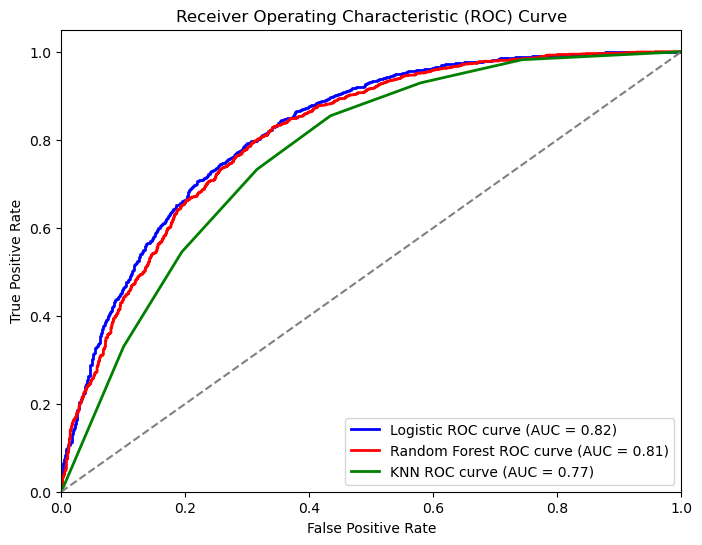

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_lr_prob = lr.predict_proba(X_test_scaled)[:, 1]
y_pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_knn_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_prob)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_prob)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)

# Calculate ROC curve and AUC for K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_prob)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In this analysis of the ROC curve, we use it to evaluate the performance of different classification models. The ROC curve is a graphical representation of the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at various thresholds for a binary classification problem. It helps us assess how well the models distinguish between positive and negative classes.

The gray dashed line in the ROC curve represents the no-skill classifier, which is essentially a random guess and corresponds to an AUC (Area Under the Curve) of 0.5. A higher AUC indicates better model performance.

Comparatively, our Logistic Regression model stands out with an AUC of 0.82, indicating its proficiency at distinguishing between positive and negative classes. The Random Forest model follows closely with an AUC of 0.81, also demonstrating strong discrimination ability. The K-Nearest Neighbors (KNN) classifier, with an AUC of 0.77, is slightly less effective than its counterparts, but it still performs reasonably well.

The AUC scores provide a clear metric for assessing each model's ability to discriminate between classes. Higher AUC scores are indicative of superior model performance, and in this case, Logistic Regression exhibits the highest discriminatory power.

Now, let's analyze the significance of these results and the visuals:

<H4>Logistic Regression Dominance</H4> 
The standout feature of this analysis is the strong performance of the Logistic Regression model. With an AUC of 0.82, it excels at distinguishing between classes, making it an excellent choice for applications where precision in class separation is crucial. This visual result is of interest to anyone considering the use of this model because it demonstrates its superiority in class discrimination.

<H4>Random Forest's Competence</H4> The Random Forest model, with an AUC of 0.81, is a close second. This visual shows that it also provides excellent discrimination, making it a strong alternative to Logistic Regression. Users looking for a well-performing model will find this information valuable.

<H4>K-Nearest Neighbors Performance</H4> The K-Nearest Neighbors classifier, with an AUC of 0.77, performs reasonably well but falls slightly behind the other two models. The visual representation illustrates its comparative performance, allowing users to make informed decisions based on the trade-offs between accuracy and computational complexity.

In conclusion, the ROC curve analysis and AUC scores are valuable tools for assessing the performance of classification models. This analysis and the accompanying visuals provide users with a clear understanding of each model's capability to distinguish between classes, enabling them to select the most appropriate model for their specific application.


<H4> Recall </H4>

Our other important metric was recall, and after running stratified 10-fold cross-validation, we found that the Random Forest classifier had the highest mean recall score over the 10 folds, with an average score of 0.7878, compared to the 0.7709 average score of the Logistic Regression model. It's worth noting that the K-Nearest Neighbors (KNN) model with 7 neighbors underperformed the other models considerably, having an average score of 0.7336.

<H3> Model Advantages </H3>


<H4> Logistic regression </H4>

Logistic regression is able to use a feature selection like lasso to regulate and introduce sparsity. Using lasso we can drive some feature coefficients to zero, which in turn improves interpretability and reduces overfitting. The model can also set the parameter C using the scikit-learn library which is the inverse of the regulation strength. In our case we used "c=0.1" which is a relativity stronger regularization than a C=1 which is a strong regularization. This parameter allows use to fit the data more closely and possibly let us capture more complex relationships, however this could potentially overfit our data. The logistic regression can also scale big datasets relatively easily along with a straightforward training process, especially when comparing to more complex models.

<H4> KNN </H4>

Our model, featuring K-Nearest Neighbors with a neighbor count of 7 and an average recall of 0.72, offers several compelling advantages. Notably, it leverages incremental learning, allowing seamless adaptation to new data as it becomes available. This attribute is particularly valuable in dynamic environments where the dataset evolves over time. Furthermore, KNN's adjustable neighbor count provides a means to strike the right balance between precision and recall, making it an adaptable and customizable solution. Its simplicity and transparency enhance model interpretability and real-time decision-making, making our KNN-based model a robust choice for data-driven tasks.

Notably, the KNN model exhibited an average recall that was somewhat lower than the other models, which might be attributable to the well-documented curse of dimensionality that KNN can encounter. Nevertheless, we proactively applied dimensionality reduction techniques to mitigate this issue. To gain a more comprehensive understanding of the performance disparity and ensure optimal results, further investigation and analysis outside of this study are warranted.

<H4> Random Forest </H4>

The Random Forest model, configured with a maximum depth of 20 and 200 estimators, proved highly advantageous for predicting our response variable, "diabetes_binary," where 1 signifies the presence of prediabetes or diabetes, and 0 indicates the absence of diabetes. With a commendable average recall of 0.80, this model showcased its ability to accurately distinguish cases of prediabetes and diabetes, making it a robust tool for medical diagnostics and healthcare applications. Its versatility, resilience to high-dimensional data, and interpretability contribute to its value in making critical decisions in healthcare settings. Additionally, the Random Forest model's ensemble approach, which combines many decision trees, reduces overfitting and enhances the model's overall robustness. This, coupled with its transparency, akin to the interpretability of logistic regression models, allows us to extract and interpret feature importance, providing valuable insights into the factors influencing diabetes diagnoses.

<H4> The best Model </H4>

It's challenging to definitively pinpoint the best-performing model. The Logistic Regression model achieved an average recall of 0.771 over the 10-fold cross-validation, whereas the Random Forest model outperformed with an average recall of 0.788. In terms of recall, the Random Forest had the edge. However, when assessing the AUC metric, the Logistic Regression model demonstrated a slightly better discriminatory power with an AUC of 0.82, compared to the Random Forest's 0.81. To assess the statistical significance of these differences, we'll conduct an ANOVA analysis. If the differences aren't statistically significant, we'll consider factors like computational efficiency and ease of deployment to decide on the most suitable model for our work.

<H4>Recall scores ANOVA test</H4>

Before conducting our ANOVA test, we aim to validate the results by ensuring that the test assumptions are met.

<H4> Assumption of equal variance </H4>

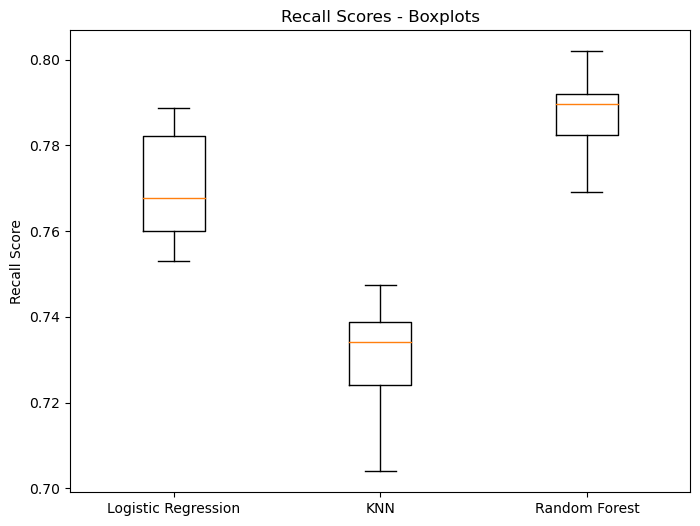

The variances are not significantly different.


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import levene

# Recall scores for our models
logistic_regression_recalls = [0.7697690692792163, 0.7886634009797061, 0.7773109243697479, 0.7529741077676697, 0.7529741077676697, 0.7655703289013296, 0.7641707487753674, 0.7851644506648006, 0.7837648705388384, 0.7585724282715185]
knn_recalls = [0.722183344996501, 0.7396780965710287, 0.7296918767507002, 0.7039888033589923, 0.7214835549335199, 0.7354793561931421, 0.7445766270118964, 0.7361791462561231, 0.7473757872638208, 0.7326801959412176]
random_forest_recalls = [0.7893631910426872, 0.8019594121763471, 0.7899159663865546, 0.7690692792162351, 0.7830650804758572, 0.7921623512946117, 0.7760671798460462, 0.7914625612316305, 0.7956613016095171, 0.7823652904128762]

# Create a list of all recall scores
all_scores = [logistic_regression_recalls, knn_recalls, random_forest_recalls]

# Create boxplots
plt.figure(figsize=(8, 6))
plt.boxplot(all_scores, labels=['Logistic Regression', 'KNN', 'Random Forest'])
plt.title('Recall Scores - Boxplots')
plt.ylabel('Recall Score')
plt.show()



# Levene's test
statistic, p_value = levene(logistic_regression_recalls, knn_recalls, random_forest_recalls)

if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")


Looking at the above code and output from the Levene test we can see that there is not enough visual and statistical evidence to suggest against the assumption of equal variance. Now we will quickly check the assumption of normality and address the assumption of independence.

<H4> Assumption of Normality  and Independence</H4> 

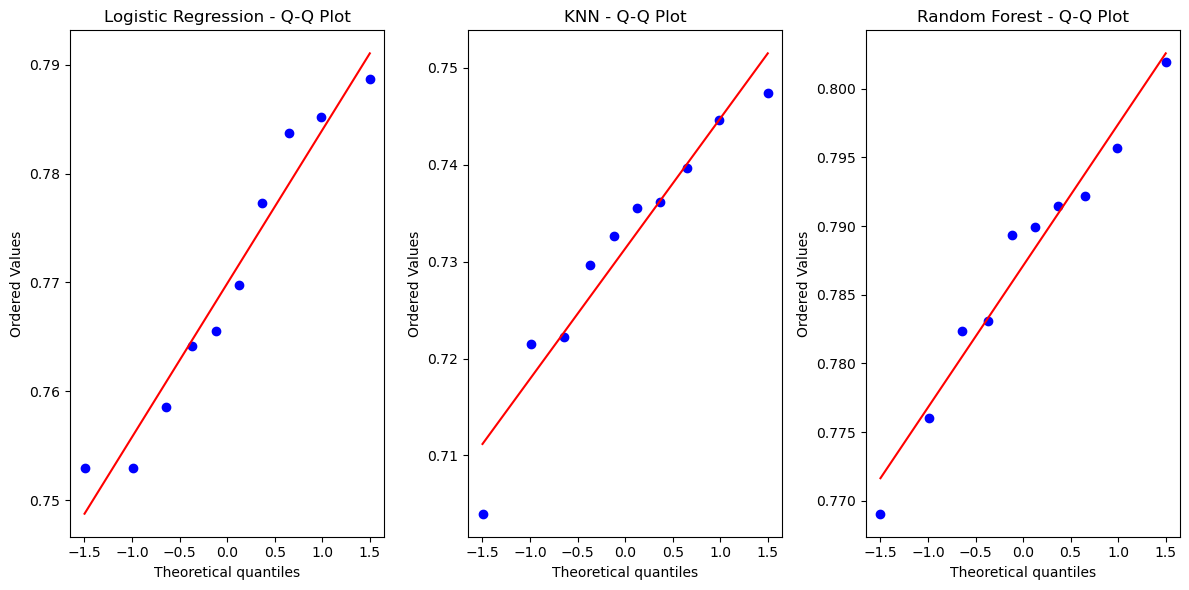

In [29]:
import scipy.stats as stats

# Create Q-Q plots for each group
plt.figure(figsize=(12, 6))
for i, scores in enumerate(all_scores):
    plt.subplot(1, 3, i + 1)
    stats.probplot(scores, dist="norm", plot=plt)
    plt.title(f'{["Logistic Regression", "KNN", "Random Forest"][i]} - Q-Q Plot')

plt.tight_layout()
plt.show()

Looking at the q-q plots there is not enough visual evidence to suggest against the assumption of normality, therefore we will proceed under the assumption that the models recall scores are normally distribute and have equal variance. We will also assume that the recall scores are independent of each other in and between the model scores. We will now proceed to run the anova.

In [22]:
import numpy as np
from scipy.stats import f_oneway

# Perform ANOVA
f_statistic, p_value = f_oneway(logistic_regression_recalls, knn_recalls, random_forest_recalls)

# Print the p-value
print("ANOVA p-value:", p_value)

# Check if the p-value is less than the significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in recall scores among the models.")
else:
    print("There is no significant difference in recall scores among the models.")


ANOVA p-value: 2.2433003829481653e-10
There is a significant difference in recall scores among the models.


<H4> Conclusion </H4>
There is strong evidence to suggest that at least one pair of models have different mean recall scores.(p-value < 0.00001 from an anova)

Based on the conclusion we can determine with 95% confidence that at least one of the model pairs ahve different mean recall scores to determine which models are signifigantly different we will run a pairwise t-tes with bonferroni correction this also has the same assumptions of the anova.

In [23]:
from scipy.stats import ttest_ind

models = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']
recall_scores = [logistic_regression_recalls, knn_recalls, random_forest_recalls]

# Perform pairwise t-tests with Bonferroni correction
alpha = 0.05
rejects = []

for i in range(len(models)):
    for j in range(i + 1, len(models)):
        t_stat, p_value = ttest_ind(recall_scores[i], recall_scores[j])
        p_value_corrected = p_value * len(models) * (len(models) - 1) / 2  # Apply Bonferroni correction
        rejects.append((models[i], models[j], p_value_corrected))

# Check for significant differences
for model1, model2, p_value_corrected in rejects:
    if p_value_corrected < alpha:
        print(f"There is a significant difference between {model1} and {model2}.")
        print(f"P-Value (corrected): {p_value_corrected:.4f}")


There is a significant difference between Logistic Regression and K-Nearest Neighbors.
P-Value (corrected): 0.0000
There is a significant difference between Logistic Regression and Random Forest.
P-Value (corrected): 0.0115
There is a significant difference between K-Nearest Neighbors and Random Forest.
P-Value (corrected): 0.0000


<H4> Conclusion </H4>
At the 0.05 alpha level there is suffecient evidence to suggest that the mean recall score of our Random Forest model is greater than the mean recall score of our Logistic Regression model.( p-value 0.0115 pairwise t-test with bonferroni correction) This means we can say with 95% confidence the Random forest model is the best preforming classification model for our response variable Diabeties_binary. 

<H2> Attribute Importance</H2>

<H3> Logistic Regression Weights </H3> 

In [21]:
# interpret the weights

# iterate over the coefficients
weights = lr.coef_.T # take transpose to make a column vector
variable_names = data1_encoded.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

HighBP has weight of 0.3351614212546064
HighChol has weight of 0.24882734076802637
CholCheck has weight of 0.19655399192056003
BMI has weight of 0.49883756618591063
Smoker has weight of -0.01954431421775982
Stroke has weight of 0.039536519635504204
HeartDiseaseorAttack has weight of 0.08453791706453734
PhysActivity has weight of 0.0
Fruits has weight of -0.014451827907322853
Veggies has weight of -0.00015004388701275186
HvyAlcoholConsump has weight of -0.18638201474988933
AnyHealthcare has weight of 0.00746205855314758
NoDocbcCost has weight of -0.03582507884911798
MentHlth has weight of -0.03403495165911678
PhysHlth has weight of -0.021848206464167852
DiffWalk has weight of 0.050836767632122054
IsMale has weight of 0.14851314406528907
GenHlth_Excellent has weight of -0.4620193297208785
GenHlth_VeryGood has weight of -0.30194565032234844
GenHlth_Good has weight of 0.0
GenHlth_Fair has weight of 0.18092598561446693
GenHlth_Poor has weight of 0.16634183980095965
No Formal Education has w

<H3> Logistic Regression Coefficient Weight Bar Chart </H3>

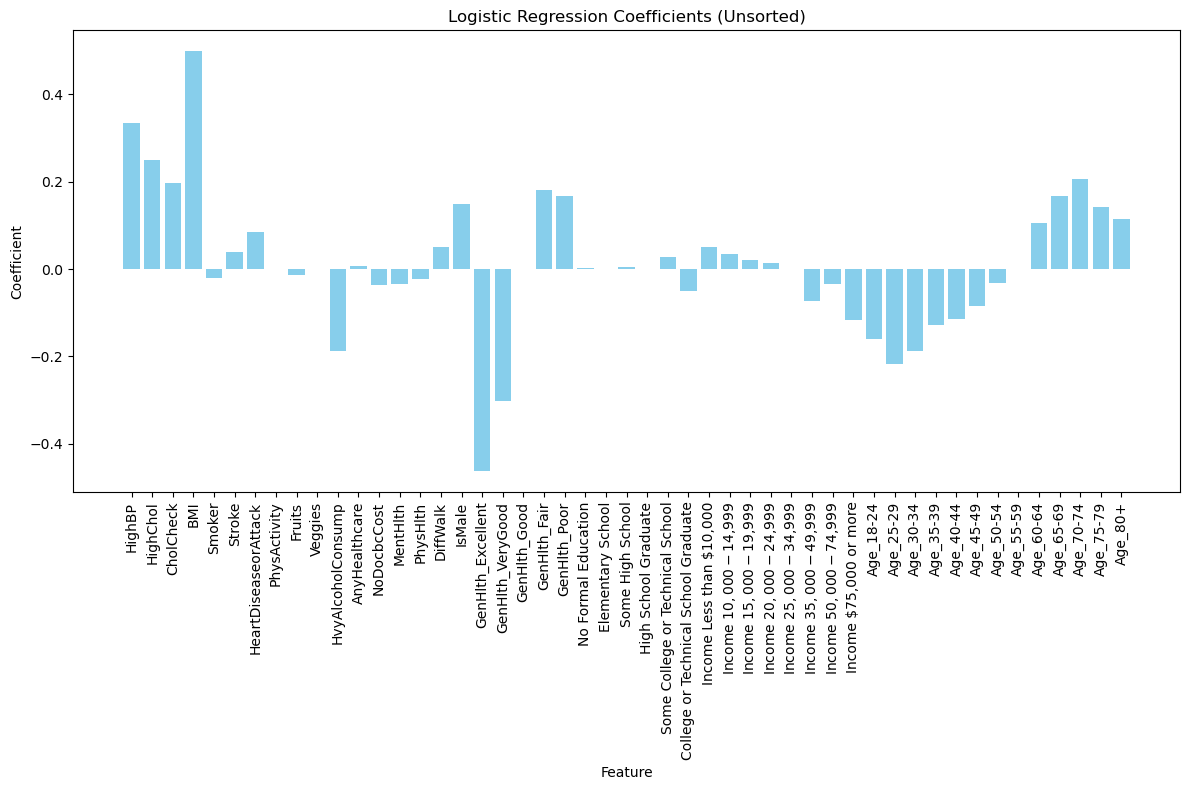

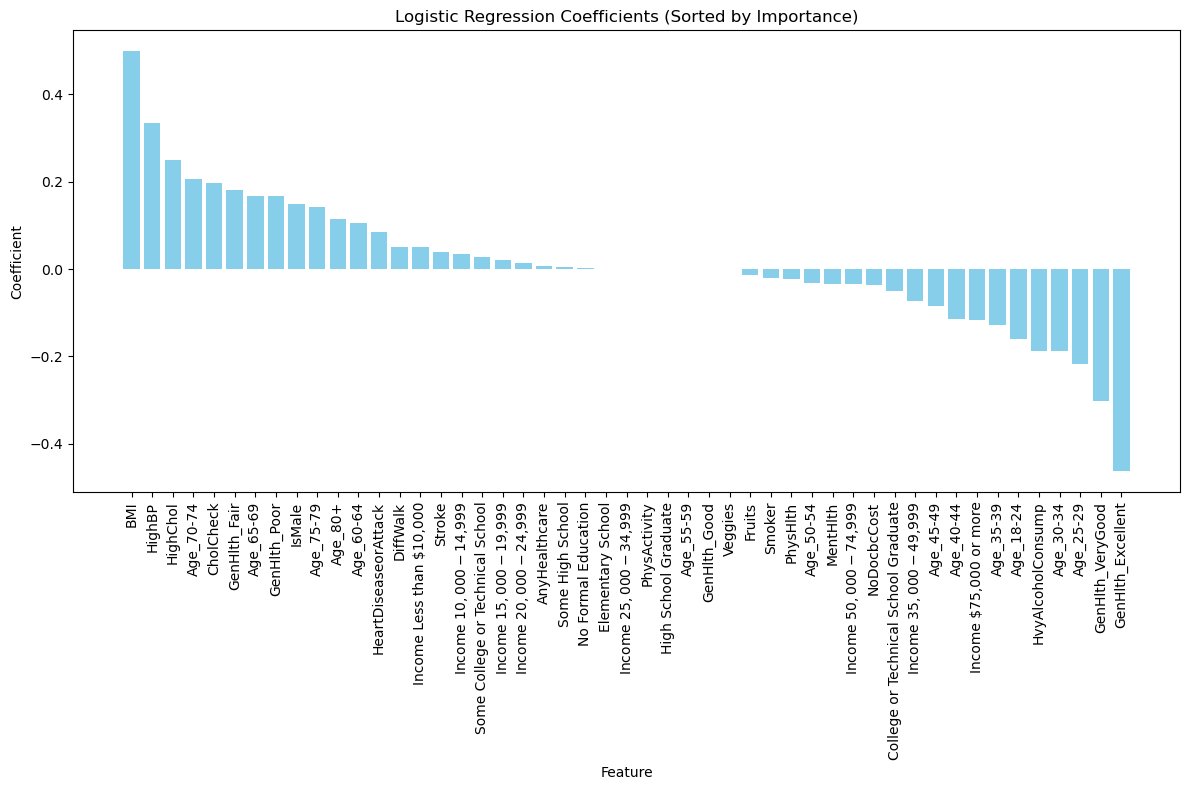

In [22]:
# Extract feature names from 'data1_encoded'
feature_names = data1_encoded.columns

# Extract the coefficients corresponding to the features
coefficients = lr.coef_[0]

# Create a Pandas Series with feature names as index and coefficients as values
feature_importance_lr = pd.Series(coefficients, index=feature_names)

# Create the bar chart without sorting
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_lr.index, feature_importance_lr.values, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients (Unsorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Sort the Series by coefficient values in descending order
feature_importance_lr_sorted = feature_importance_lr.sort_values(ascending=False)

# Create the bar chart with the sorted Series
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_lr_sorted.index, feature_importance_lr_sorted.values, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients (Sorted by Importance)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<H3> Random Forest Feature Importance </H3>

In [23]:
# Create a DataFrame to store feature importances
feature_importances_df_rf = pd.DataFrame({'Feature': data1_encoded.columns, 'Importance': rf.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importances_df_rf_sorted = feature_importances_df_rf.sort_values(by='Importance', ascending=False)

# Iterate over the features and their importances
for index, row in feature_importances_df_rf.iterrows():
    feature_name = row['Feature']
    importance = row['Importance']
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: HighBP, Importance: 0.09872179143639702
Feature: HighChol, Importance: 0.0481417548704781
Feature: CholCheck, Importance: 0.006326224739761669
Feature: BMI, Importance: 0.1396449240514074
Feature: Smoker, Importance: 0.02318955630636442
Feature: Stroke, Importance: 0.010440295836244626
Feature: HeartDiseaseorAttack, Importance: 0.025120094857101895
Feature: PhysActivity, Importance: 0.0210084959537452
Feature: Fruits, Importance: 0.023583494668064663
Feature: Veggies, Importance: 0.019177690144556808
Feature: HvyAlcoholConsump, Importance: 0.012010883432350423
Feature: AnyHealthcare, Importance: 0.007213543073806704
Feature: NoDocbcCost, Importance: 0.011324121911714816
Feature: MentHlth, Importance: 0.04338251832215565
Feature: PhysHlth, Importance: 0.058520874627811574
Feature: DiffWalk, Importance: 0.029682951795702146
Feature: IsMale, Importance: 0.02399543076110148
Feature: GenHlth_Excellent, Importance: 0.04092885173699169
Feature: GenHlth_VeryGood, Importance: 0.0295662

<H3> Bar Charts for RF Feature Importance </H3>

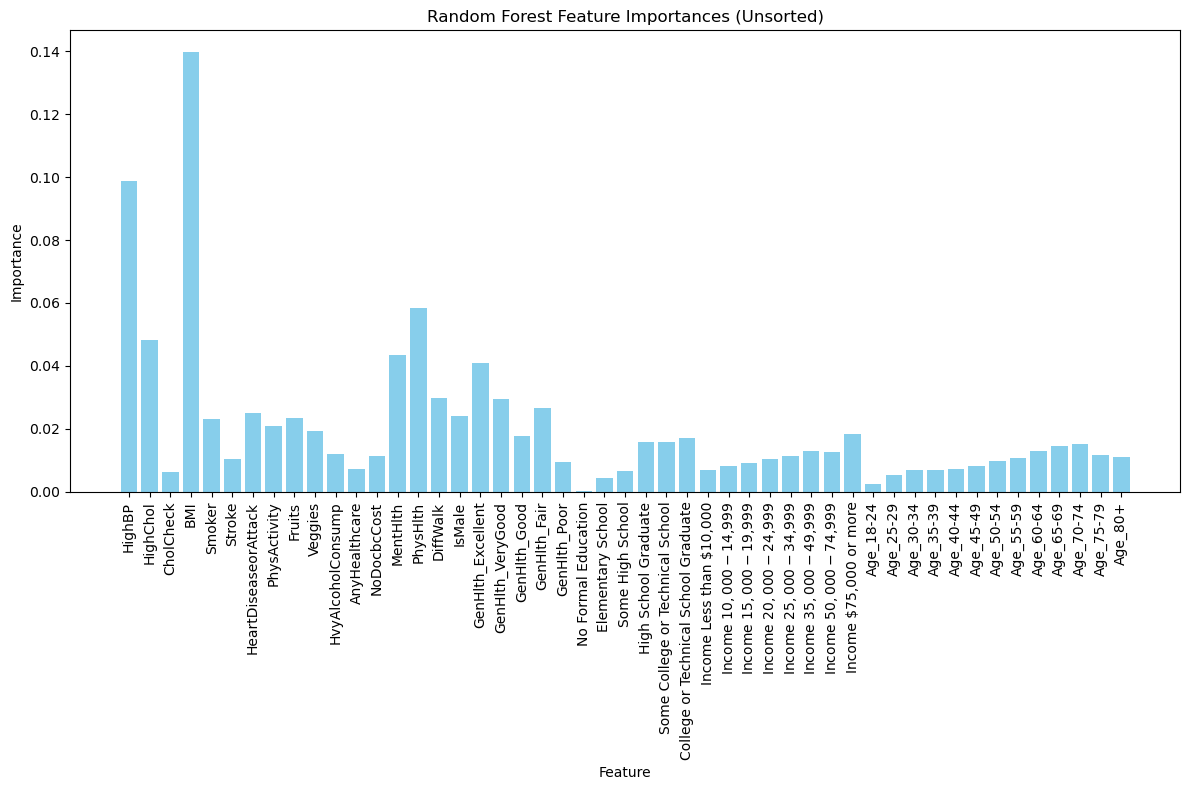

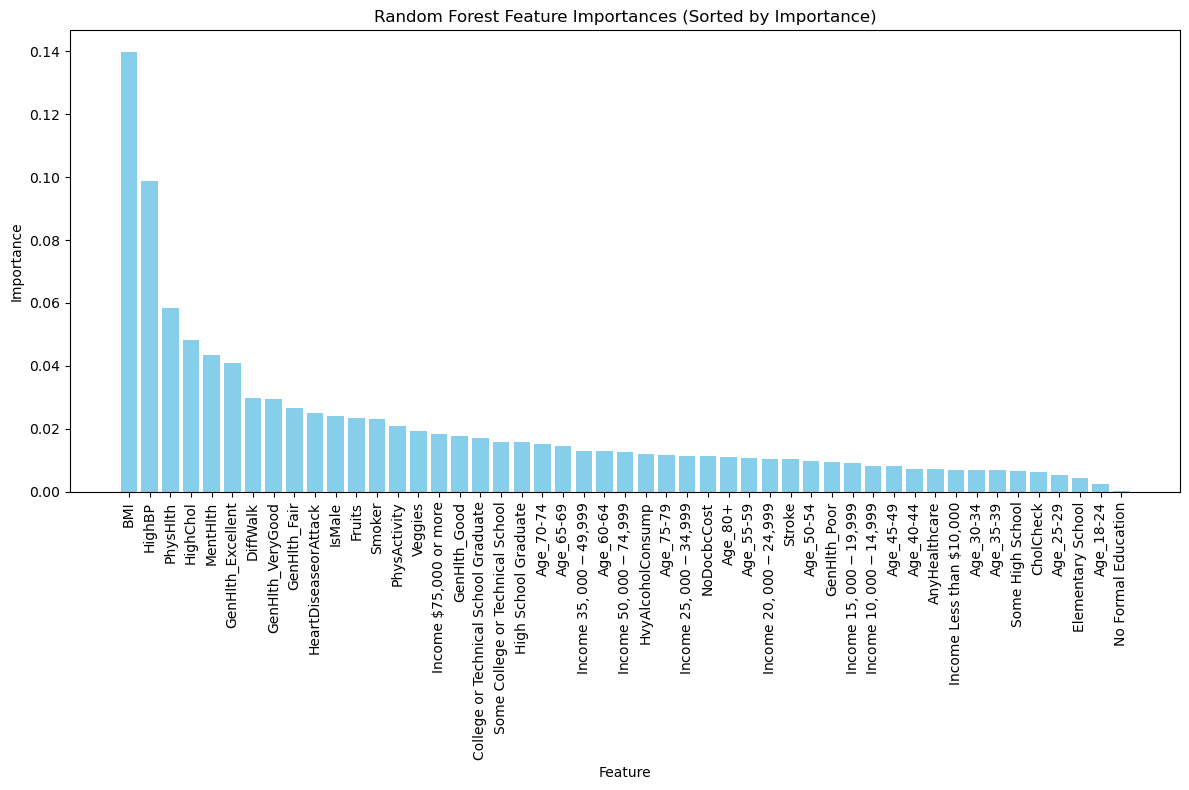

In [24]:
# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(feature_importances_df_rf['Feature'], feature_importances_df_rf['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances (Unsorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create the sorted bar chart
plt.figure(figsize=(12, 8))
plt.bar(feature_importances_df_rf_sorted['Feature'], feature_importances_df_rf_sorted['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances (Sorted by Importance)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<H3> KNN Feature Importance </H3>

In [25]:
from sklearn.metrics import accuracy_score

# Define a function to calculate permutation importance
def calculate_permutation_importance(model, X, y, metric, n_permutations=10, random_state=42):
    np.random.seed(random_state)
    baseline_score = metric(y, model.predict(X))
    importances = []

    for feature in range(X.shape[1]):
        importance_scores = []
        for _ in range(n_permutations):
            X_permuted = X.copy()
            X_permuted[:, feature] = np.random.permutation(X_permuted[:, feature])
            permuted_score = metric(y, model.predict(X_permuted))
            importance = baseline_score - permuted_score
            importance_scores.append(importance)

        importances.append(np.mean(importance_scores))
    
    return importances

# Calculate permutation importances using accuracy as the metric
perm_importances = calculate_permutation_importance(knn, X_test_scaled, y_test, metric=accuracy_score)

In [26]:
# Print feature importances
for feature_name, importance in zip(feature_names, perm_importances):
    print(f"Feature {feature_name}: {importance:.4f}")

Feature HighBP: 0.0122
Feature HighChol: 0.0054
Feature CholCheck: 0.0035
Feature BMI: 0.0102
Feature Smoker: 0.0045
Feature Stroke: -0.0004
Feature HeartDiseaseorAttack: -0.0015
Feature PhysActivity: 0.0011
Feature Fruits: 0.0032
Feature Veggies: 0.0019
Feature HvyAlcoholConsump: 0.0005
Feature AnyHealthcare: 0.0004
Feature NoDocbcCost: 0.0013
Feature MentHlth: 0.0013
Feature PhysHlth: -0.0007
Feature DiffWalk: 0.0034
Feature IsMale: 0.0031
Feature GenHlth_Excellent: 0.0111
Feature GenHlth_VeryGood: 0.0088
Feature GenHlth_Good: 0.0055
Feature GenHlth_Fair: 0.0104
Feature GenHlth_Poor: 0.0018
Feature No Formal Education: 0.0002
Feature Elementary School: 0.0002
Feature Some High School: 0.0002
Feature High School Graduate: 0.0013
Feature Some College or Technical School: -0.0003
Feature College or Technical School Graduate: 0.0018
Feature Income Less than $10,000: 0.0030
Feature Income $10,000 - $14,999: -0.0008
Feature Income $15,000 - $19,999: 0.0027
Feature Income $20,000 - $24,999:

<B> Bar Charts for Permutation Feature Importance for KNN </B>

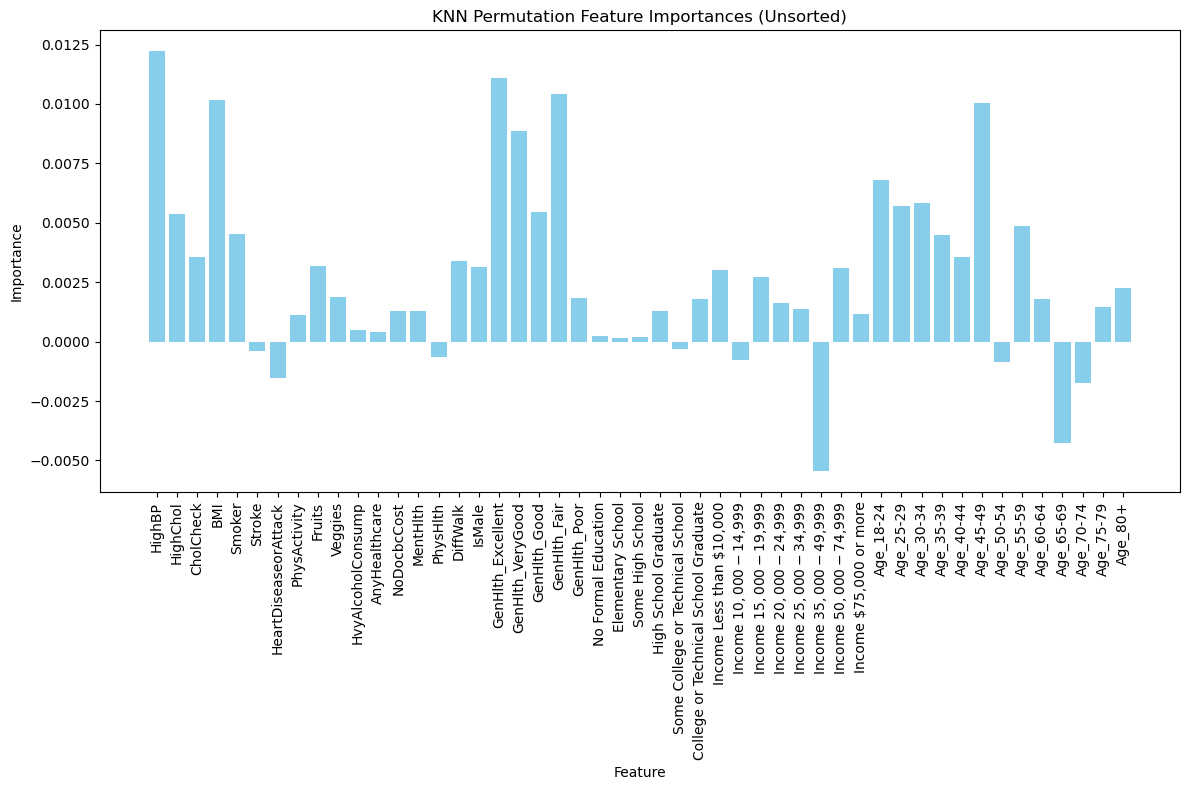

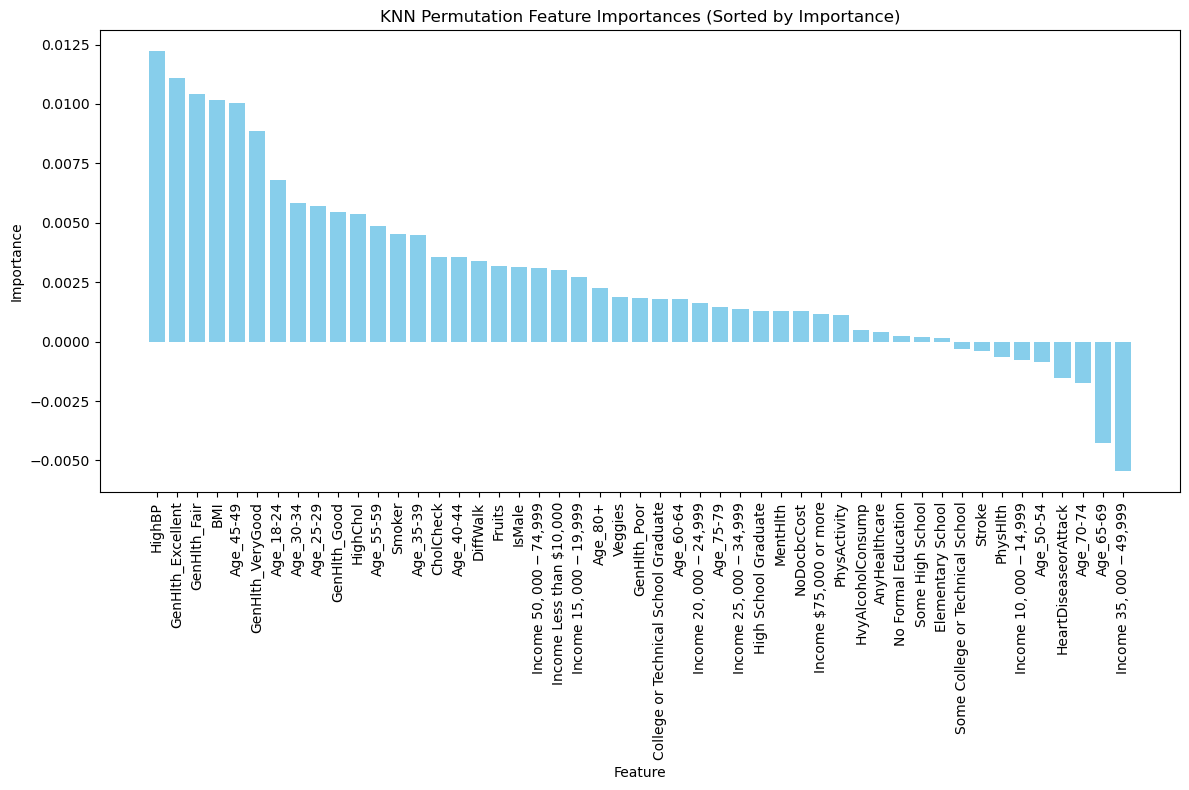

In [27]:
# Specify your feature names (replace with your actual feature names)
feature_names = data1_encoded.columns

# Create a DataFrame to store the feature importances
feature_importances_df_knn = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importances})

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(feature_importances_df_knn['Feature'], feature_importances_df_knn['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('KNN Permutation Feature Importances (Unsorted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Sort the DataFrame by importance in descending order
feature_importances_df_knn_sorted = feature_importances_df_knn.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(feature_importances_df_knn_sorted['Feature'], feature_importances_df_knn_sorted['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('KNN Permutation Feature Importances (Sorted by Importance)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [28]:
# Create a dataframe for comparison

# Convert the LR Series to a DataFrame
feature_importance_df_lr = pd.DataFrame({'Feature': feature_importance_lr.index, 'Coefficient': feature_importance_lr.values})

# Merge the DataFrames
final_df = feature_importance_df_lr.merge(feature_importances_df_rf, on="Feature", how="inner")
final_df = final_df.merge(feature_importances_df_knn, on="Feature", how="inner")

# Rename columns for clarity
final_df = final_df.rename(columns={"Coefficient": "LR Coefficient", "Importance_x": "RF", "Importance_y": "KNN"})

# Set the Feature column as the index for plotting
final_df.set_index("Feature", inplace=True)

# Display the final DataFrame
print(final_df)

                                      LR Coefficient        RF       KNN
Feature                                                                 
HighBP                                      0.335161  0.098722  0.012216
HighChol                                    0.248827  0.048142  0.005368
CholCheck                                   0.196554  0.006326  0.003544
BMI                                         0.498838  0.139645  0.010186
Smoker                                     -0.019544  0.023190  0.004542
Stroke                                      0.039537  0.010440 -0.000379
HeartDiseaseorAttack                        0.084538  0.025120 -0.001514
PhysActivity                                0.000000  0.021008  0.001101
Fruits                                     -0.014452  0.023583  0.003200
Veggies                                    -0.000150  0.019178  0.001858
HvyAlcoholConsump                          -0.186382  0.012011  0.000482
AnyHealthcare                               0.00746

<Figure size 1200x800 with 0 Axes>

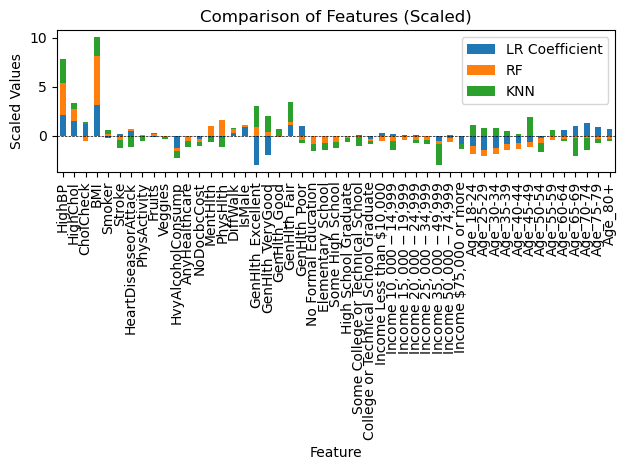

In [29]:
# Specify the columns to scale
columns_to_scale = ['LR Coefficient', 'RF', 'KNN']

# Scale the specified columns
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

# Create a bar chart with scaled values
plt.figure(figsize=(12, 8))
ax = final_df.plot(kind='bar', stacked=True)
plt.xlabel('Feature')
plt.ylabel('Scaled Values')
plt.title('Comparison of Features (Scaled)')
plt.xticks(rotation=90)

# Add a reference line at 0
ax.axhline(0, color='black', linewidth=0.5, linestyle='--')

plt.tight_layout()
plt.show()

<H3> Feature Importance across Models </H3>

As the stacked bar chart illustrates, there are quite a few features that at least two models agreed on their importance. Most noteably, High Blood Pressure, High Cholesterol, and BMI were the most important features for all three models. The two models with the most disagreement are Logistic Regression and KNN because there are a few features that had positive predictive value for KNN and negative predictive value for Logistic Regression, or vice versa: GenHealth_Excellent, GenHealth_VeryGood, Ages 18-35 and Ages 60+, and HvyAlcoholConsump. 

Since Logistic Regression is our chosen model, the following sorts features according to the logistic regression model, as either increasing the probability of being classified prediabetes/diabetes, decreasing the probability, or little to no effect on the probability of being classified:

<H3>Features that increased the probability of being classified as having prediabeties or diabetes </H3>

<B> BMI (Agreement among 3 models - Logistic Regression Weight: 0.498; Random Forest Gini Importance: 0.140; KNN Permutation Importance: 0.010)</B>

Body Mass Index is a measure of weight as related to height, which has association with diabetes due to how it measures obesity, which is one of the most well known effects of diabetes. We must also consider that there is a difference in obesity between Type 1 and Type 2 diabetes, which means that if we were only looking at Type 2 diabetics, BMI may have even greater feature importance. It is still the attribute with the highest Logistic Regression coefficient weight, so the nuance between types of diabetes is just something to keep in mind.

<B> HighBP (Agreement among 3 models - Logistic Regression Weight: 0.335; Random Forest Gini Importance: 0.098; KNN Permutation Importance: 0.012) and HighChol (Agreement among three models: Logistic Regression Weight: 0.249; Random Forest Gini Importance: 0.048; KNN Permutation Importance: 0.005) </B>

High blood pressure (HighBP) and High Cholesterol (HighChol) also increases the probability of the positive class. Individuals with high blood pressure and/or high cholesterol are more likely to have diabetes. This is because diabetes damages the small blood vessels in your body over time, which causes the walls of the blood vessels to stiffen. This increases pressure, which leads to the condition of high blood pressure. Diabetes also damages the lining of your arteries, which means it's more likely that cholesterol will stick to them, making them narrow or even blocked – which can also increase blood pressure.

<B> CholCheck (Agreement between LR and KNN - Logistic Regression Weight: 0.197; Random Forest Gini Importance: 0.006; KNN Permutation Importance: 0.004) </B>
Having a cholesterol check increases the probability of the diabetic class. This suggests that individuals who have their cholesterol checked are more likely to have diabetes. Doctors recommend annual cholesterol checks for individuals with type 2 diabetes or individuals who have had type 1 diabetes for at least five years. Since cholesterol checks are a part of routine health procedures for diabetics, this finding meets our expectation that this feature has high importance.
 
<B> Age over 60 (Direction Disagreement between LR with RF and KNN - Logistic Regression Weight: 0.104, Random Forest Gini Importance: 0.013, KNN Permutation Importance: -0.001 for Ages 70-74)</B>

Since ages 60+ variables have positive coefficients, an increase in age after 60 increases the probability of the individual having diabetes. This aligns with our expectations since checking for diabetes becomes a more routine part of health examinations as patients age.

<B> GenHlth_Fair (Agreement between LR and KNN, RF found not important - Logistic Regression Weight: 0.158; Random Forest Gini Importance: 0.025; KNN Permutation Importance: 0.006) and GenHlth_Poor (Agreement between LR and KNN, RF found not important -Logistic Regression Weight: 0.134; Random Forest Gini Importance: 0.009; KNN Permutation Importance: 0.002) </B>

Having fair general health is associated with an increased probability of having diabetes. Similarly, the “poor” level of general health also has a positive coefficient, indicating that better general health is associated with a reduced likelihood of the outcome. 

<B> IsMale (More important in LR model than RF and KNN - Logistic Regression Weight: 0.125; Random Forest Gini Importance: 0.25; KNN Permutation Importance: 0.003) </B>

Being male increases the probability of the positive class, indicating that gender is a factor in the outcome prediction. According to the National Center for Biotechnology Information (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9408508/), there are many different factors for this outcome, both biological and environmental. For example, one environmental factor is how doctors approach diagnosis for women (many doctors use a woman’s weight as a cause rather than a symptom for other medical ailments, so they are less likely than a man of the same weight symptoms to be diagnosed as diabetic).

<H3> Features that decreased the probability of being classified as having prediabeties or diabetes </H3>

<B> GenHlth_Excellent (High Directionality Disagreement between LR and KNN - Logistic Regression Weight: -0.434; Random Forest Gini Importance: 0.034; KNN Permutation Importance: 0.016) and GenHlth_VeryGood (High Directionality Disagreement between LR and KNN - Logistic Regression Weight: -0.294; Random Forest Gini Importance: 0.027; KNN Permutation Importance: 0.008)</B>

Having excellent general health is associated with a decreased probability of having diabetes. Similarly, the ‘Very Good’ levels of general health also has a negative coefficient, indicating that better general health is associated with a reduced likelihood of the outcome. Someone’s excellent health has higher feature importance to the model because it’s likely that the other health variables like “high blood pressure” are negative, so the model relies heavier on the general health factor to predict non-diabetes. 

<B> Age below 55 (Agreement between LR and RF, KNN disagree in directionality or did not find important - Logistic Regression Weight: -0.182 Random Forest Gini Importance: 0.003, KNN Permutation Importance: 0.004 at Age 18-24) and other “Age” variables below 55 </B>

Since ages 18-54 variables have negative coefficients, an increase in age up to 55 decreases the probability of the individual having diabetes. Since other health variables are associated with higher ages, it makes sense that the model relies more on variables like high cholesterol and high blood pressure as age increases. 

<B> Income greater than 35k (Directionality agreement between all 3 models, but KNN found income features more important- Logistic Regression Weight: -0.120, Random Forest Gini Importance: 0.019, KNN Permutation Importance: -0.003 at >75K) </B>

Higher Income categories also have negative coefficients, suggesting that higher income levels are associated with a reduced probability of having diabetes. This could indicate that individuals with higher income are less likely to have the outcome being predicted.

<B> HvyAlcoholConsump (LR and RF Agreement, but KNN disagreed on Directionality and Importance - Logistic Regression Weight: -0.108; Random Forest Gini Importance: 0.010; KNN Permutation Importance: 0.007) </B>

Heavy alcohol consumption decreases the probability of the positive class. Individuals who consume alcohol heavily are less likely to be classified as having diabetes. It is reasonable to assume that this is an effect of a diabetes diagnosis because diabetics are often told by doctors to avoid heavy drinking, because it can cause ketoacidosis (which is life-threatening) and hypertriglyceridemia (which greatly increases the risk of heart disease). 

<H3> Features that had practically no effect on the probability of being classified as having prediabetes or diabetes </H3>

<B>Income less than 25k (All 3 models agree, though KNN finds income less than 10k more important - Logistic Regression Weight: 0.045, Random Forest Gini Importance: 0.011, KNN Permutation Importance: 0.002 at 20k – 25k)</B>

Lower Income categories have low positive coefficients, suggesting that lower income levels are not very important to the model predictions. This does not suprise us as wealth disparities have less to do with health than they do with access to resources and social safety nets.

<B> Diet and Activity Choices (KNN finds these features important, but RF and LR agree on their lack of importance - Logistic Regression Weight: -0.025, Random Forest Gini Importance: 0.022, KNN Permutation Importance: -0.003 for Physical activity; Logistic Regression Weight: -0.015, Random Forest Gini Importance: 0.024, KNN Permutation Importance: -0.004 for Fruit Consumption; and Logistic Regression Weight: -0.039, Random Forest Gini Importance: 0.019, KNN Permutation Importance: -0.003 for Veggie consumption)</B>

We could remove physical activity and fruit/veggie consumption from the model and it would not change the outcome. This may have to do with the usefulness of the data gathered – people who eat at least one fruit or veggie a day probably have a more well-rounded diet than those who said they did not, but a healthy diet does not necessarily have much to do with diabetes. Patients with Type 2 diabetes can manage the disease with diet, including eating fruits and vegetables every day, but there are plenty of people who make healthy diet choices regardless of a diabetic diagnosis. There are environmental factors for someone’s dietary choices, like how some cultures incorporate fruits and vegetables better than other cultures. Likewise, physical activity may not necessarily mean “working out to lose weight” or “managing diabetes symptoms” – physically active can also mean sports or fitness goals like weight lifting. People have a variety of motivations for being physically active, so we would not expect it to have much correlation with a diabetes diagnosis. 

<B> DiffWalk (All 3 models agree - Logistic Regression Weight: 0.032; Random Forest Gini Importance: 032; KNN Permutation Importance: 0.002)</B>

Difficulty walking is associated with a slight increased probability of the positive class, but it is not highly impactful to the model. This suggests that individuals with difficulty walking may have a higher likelihood of having diabetes, but there is not enough of a correlation to make it important to the model. The medical explanation for why this is considered a factor is that chronically elevated blood sugars can damage nerves that tell muscles how to move. This can lead to muscle weakness. 

<B>Insurance (Agreement among all 3 models - Logistic Regression Weight: 0.0, Random Forest Gini Importance: 0.007, KNN Permutation Importance: 0.001 for Any Healthcare Coverage and Agreement among all 3 models - Logistic Regression Weight: 0.029, Random Forest Gini Importance: 0.011, KNN Permutation Importance: 0.0003 for No Doctor because Cost)</B>

The general perception of uninsured Americans is due to underinsured Americans (43%, according to the Commonwealth Fund Biennial Health Insurance Survey) who have insurance but it is insufficient for their needs. This feature may be more important to other diseases, but diabetes has a high prevalence in the United States – around 10%. Most insurances do cover the diagnosis and treatment of diabetes, though that varies by state (see the effect of state legislation at: https://www.ncsl.org/health/diabetes-state-mandates-and-insulin-copayment-caps). We could remove this feature from the model and it would have little to no effect on the predictive value for the diabetes class.  

<B> Stroke (All 3 models agree - Logistic Regression Weight: 0.026; Random Forest Gini Importance: 0.011; KNN Permutation Importance: 0.002) and HeartDiseaseorAttack (Logistic Regression Weight: 0.099; Random Forest Gini Importance: 0.022; KNN Permutation Importance: -0.0004) </B>

These variables are associated with an increased probability of the positive class, but they are not very important to the model. As mentioned with the high blood pressure, the damage that occurs to blood vessels over time in individuals with diabetes increases their risk of heart disease and stroke, but it is not a great predictor of whether someone has diabetes.

<B> Education (RF and KNN disagree with LR for High School Graduate and below, but all 3 models agree that College or Post-Grad are not important - Logistic Regression Weight: -0.024, Random Forest Gini Importance: 0.018, KNN Permutation Importance: -0.004 at College or Technical School Graduate) </B>

All the weights of the education coefficients are around 0, indicating low importance to the model. Our domain knowledge indicates that education may play a role in the amount of medical knowledge someone has, it may cause a gap in formal diagnoses and/or such significant delay in treatment that health issues are exacerbated. However, these effects are negligible in the logistic regression model.

<B>Mental and Physical Health (RF and KNN disagree with LR on these features importance, but do not agree with each other on directionality - Logistic Regression Weight: -0.019, Random Forest Gini Importance: 0.045, KNN Permutation Importance: -0.002 for Mental and Logistic Regression Weight: -.013, Random Forest Gini Importance: 0.059, KNN Permutation Importance: 0.0002 for Physical) </B>

These features measures perception, which is highly subjective, and thus not reliable for prediction at all. Two people can have the same mental or physical health indicators and have wildly different perceptions of that. We would not expect this feature to be important to the model and these low feature importance numbers meet our expectation. 

<B>Smoker (Agreement among all 3 models - Logistic Regression Weight: -0.020; Random Forest Gini Importance: 0.023; KNN Permutation Importance: 0.0004)</B>

The reason that smoking is considered a risk factor for diabetes is because it can make managing the disease and regulating insulin levels more difficult. High levels of nicotine can lessen the effectiveness of insulin, causing smokers to need more insulin to regulate blood sugar levels. In the model, however, it is not very important for predicting whether the individual has diabetes or not. Because smoking is a lifestyle choice, there are a host of factors not measured here for why people are smokers that have very little to do with diabetes.


<H2> Deployment </H2>

Diabetes is a common autoimmune disease that affects 37.3 million adults, with roughly 8.5 million cases going undiagnosed. Without extreme measures a person suffering from untreated diabetes may experience excessive thirst, hunger, and urination. More severe symptoms include volatile mood swings, blurry vision, and long lasting damage to a person's circulatory system if untreated for a extended period of time. That being said, hospitals, clinics, and healthcare treatment centers spend copious amounts of time and resources into researching and aiding people that show early symptoms of type 1 or 2 diabetes. With help from our final model we will be able to implement another avenue of diabetic detection by using current statistics with our machine learning algorithm. Throughout the testing and training process we used recall and AUROC to measure our models value. Therefore, using possible new features presented by a healthcare center and continued monitoring of our recall and AUROC we will be able to hone in and grow our modeling system to fit specific needs and criteria. New features might include breakthrough research on new diabetic patterns, findings on a cellular level, or other sedentary lifestyle choices. We would be able to deploy our model in various ways. For example, we could set up a controlled experiment to see how well it benefits the clinic/patients and provide a paired t-test or ANOVA table to see if there is real statistical evidence to prove that one way is better than another. Once implemented into the system or healthcare center our our team could set up and auto-update function that naturally learns and grows with new incoming findings and data point, however, with new breakthroughs in research out team would most likely manually rework and integrate features as needed.

<H2> Exceptional Work </H2>

In our "Exceptional Work" segment, we have chosen to take our model optimization a step further by fine-tuning it with the specific goal of achieving a recall score of 0.90. Our primary objective is to investigate the trade-off between model generalizability and recall performance to assess its practical implications. Additionally, we will re-evaluate the area under the ROC curve (AUC) for these newly tuned models to determine whether there has been a significant impact on this key performance metric.

Logistic Regression Threshold @ 0.90 Recall: 0.33
Random Forest Threshold @ 0.90 Recall: 0.35
K-Nearest Neighbors Threshold @ 0.90 Recall: 0.29


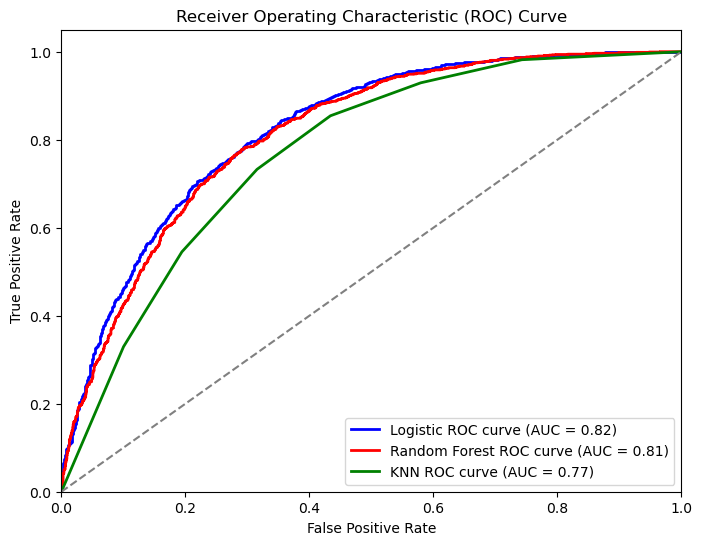

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_lr_prob = lr.predict_proba(X_test_scaled)[:, 1]
y_pred_rf_prob = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_knn_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_prob)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_prob)

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)

# Calculate ROC curve and AUC for K-Nearest Neighbors
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn_prob)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Find the threshold for a specific recall rate (e.g., 0.90) for each model
desired_recall = 0.90
threshold_lr = thresholds_lr[np.argmax(tpr_lr >= desired_recall)]
threshold_rf = thresholds_rf[np.argmax(tpr_rf >= desired_recall)]
threshold_knn = thresholds_knn[np.argmax(tpr_knn >= desired_recall)]

# Print the threshold for each model
print(f'Logistic Regression Threshold @ {desired_recall:.2f} Recall: {threshold_lr:.2f}')
print(f'Random Forest Threshold @ {desired_recall:.2f} Recall: {threshold_rf:.2f}')
print(f'K-Nearest Neighbors Threshold @ {desired_recall:.2f} Recall: {threshold_knn:.2f}')

plt.show()


The code above was generated by feeding Chat-Gpt with our original ROC-curve and asking it to pull out the thresholds for each model to acheive 0.90 recall. We will no refit the models at these thresholds.

In [47]:
# Assuming you have a trained logistic regression model as lr
threshold_lr = 0.33
threshold_rf = 0.35
threshold_knn = 0.29
y_pred_lr_custom = (y_pred_lr_prob >= threshold_lr).astype(int)
y_pred_rf_custom = (y_pred_rf_prob >= threshold_rf).astype(int)
y_pred_knn_custom = (y_pred_knn_prob >= threshold_knn).astype(int)

<H3> Next Steps </H3>

Now that we have refit the models, let's assess how these models compare to the original ones.

<H4> AUC Comparison </H4> 

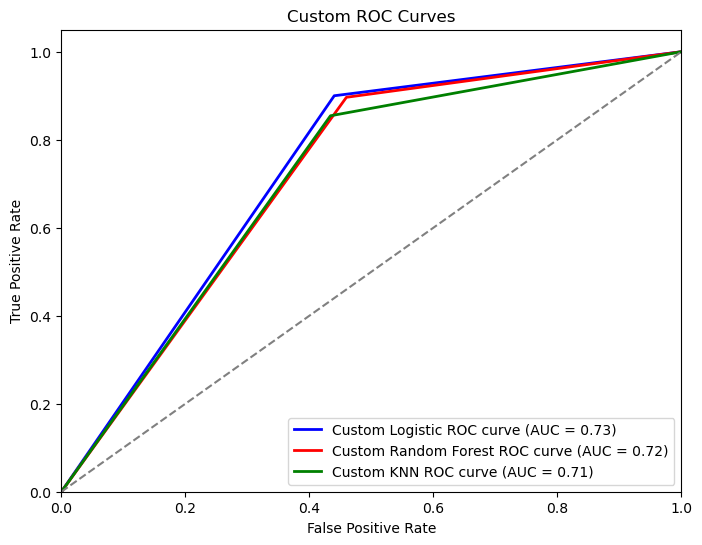

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculate the ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_custom)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr_custom)

# Calculate the ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_custom)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_custom)

# Calculate the ROC curve for K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_custom)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_custom)

# Plot ROC curves for the models with custom thresholds
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Custom Logistic ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Custom Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'Custom KNN ROC curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Custom ROC Curves')
plt.legend(loc='lower right')
plt.show()


<H3> Comparing the ROC curves </H3> 

The initial AUC scores for all three models were notably high: approximately 0.82 for Logistic Regression (LR), 0.81 for Random Forest (RF), and 0.77 for K-Nearest Neighbors (KNN). These scores signified the models' exceptional ability to discriminate between positive and negative cases.

However, when custom thresholds were introduced to prioritize recall, a noticeable decline in AUC scores ensued. The AUC figures dropped to 0.73 for LR, 0.72 for RF, and 0.71 for KNN, respectively. This decline was expected since custom thresholds inherently emphasize recall at the cost of precision.

<H4> Moving Forward </H4>
In the subsequent phase of our analysis, we will delve into a comparison of the correlation matrices between the original models and the modified versions. While precision wasn't the primary metric guiding our model selection, it offers valuable insights into the model's generalizability. Furthermore, we will thoroughly evaluate the trade-off in precision between the original models and their customized counterparts using confusion matrices.



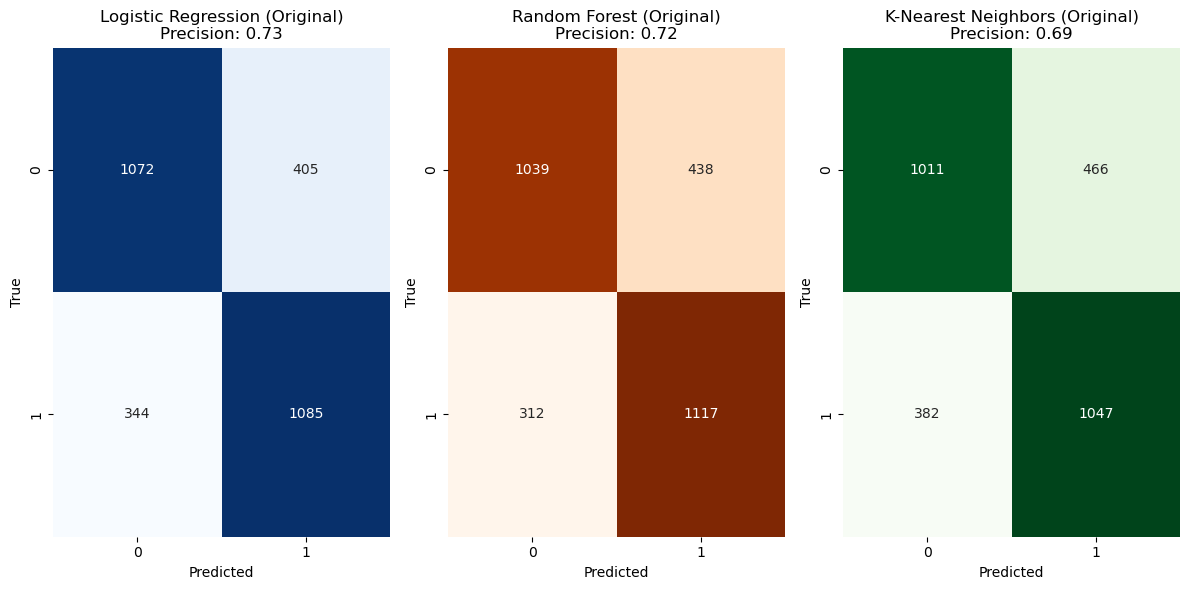

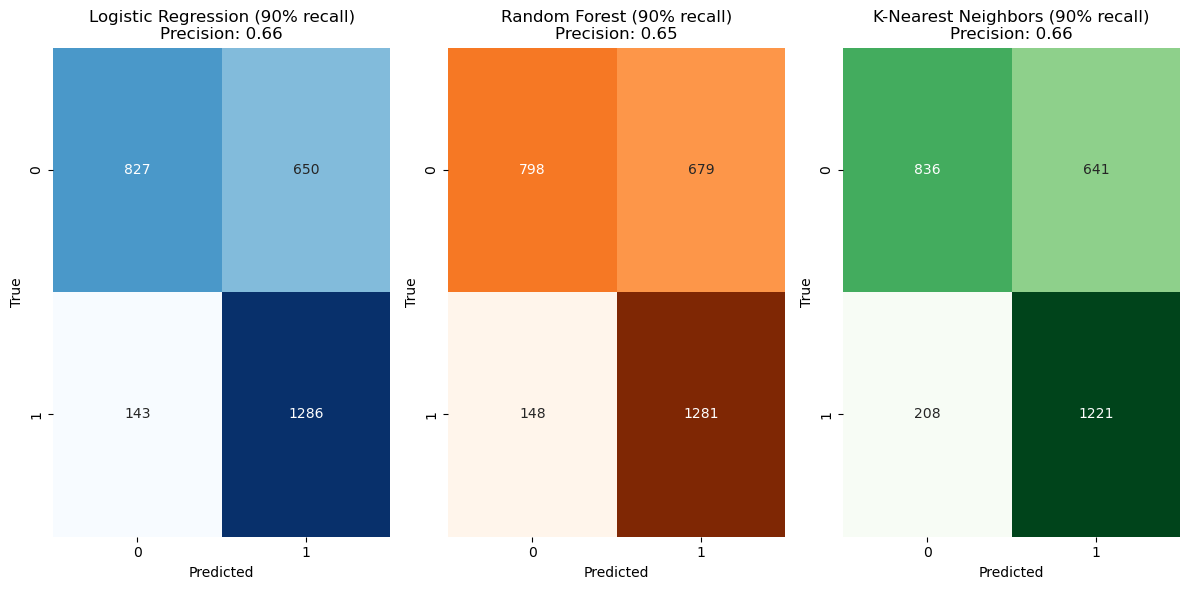

In [52]:
from sklearn.metrics import confusion_matrix, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the true binary labels (y_test) and probability predictions for both original and new models
# y_test, y_pred_lr_prob, y_pred_rf_prob, y_pred_knn_prob
# y_pred_lr_custom, y_pred_rf_custom, y_pred_knn_custom

# Convert probability predictions to binary predictions using a threshold of 0.5
y_pred_lr_original = (y_pred_lr_prob >= 0.5).astype(int)
y_pred_rf_original = (y_pred_rf_prob >= 0.5).astype(int)
y_pred_knn_original = (y_pred_knn_prob >= 0.5).astype(int)

# Create confusion matrices for the original models
confusion_lr_original = confusion_matrix(y_test, y_pred_lr_original)
confusion_rf_original = confusion_matrix(y_test, y_pred_rf_original)
confusion_knn_original = confusion_matrix(y_test, y_pred_knn_original)

# Create confusion matrices for the models with custom thresholds
confusion_lr_custom = confusion_matrix(y_test, y_pred_lr_custom)
confusion_rf_custom = confusion_matrix(y_test, y_pred_rf_custom)
confusion_knn_custom = confusion_matrix(y_test, y_pred_knn_custom)

# Calculate precision scores for each model
precision_lr_original = precision_score(y_test, y_pred_lr_original)
precision_rf_original = precision_score(y_test, y_pred_rf_original)
precision_knn_original = precision_score(y_test, y_pred_knn_original)

precision_lr_custom = precision_score(y_test, y_pred_lr_custom)
precision_rf_custom = precision_score(y_test, y_pred_rf_custom)
precision_knn_custom = precision_score(y_test, y_pred_knn_custom)

# Plot the confusion matrices and print precision scores for the original models
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_lr_original, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Logistic Regression (Original)\nPrecision: {precision_lr_original:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 2)
sns.heatmap(confusion_rf_original, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title(f"Random Forest (Original)\nPrecision: {precision_rf_original:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 3)
sns.heatmap(confusion_knn_original, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title(f"K-Nearest Neighbors (Original)\nPrecision: {precision_knn_original:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

# Plot the confusion matrices and print precision scores for the models with custom thresholds
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_lr_custom, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Logistic Regression (90% recall)\nPrecision: {precision_lr_custom:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 2)
sns.heatmap(confusion_rf_custom, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title(f"Random Forest (90% recall)\nPrecision: {precision_rf_custom:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 3, 3)
sns.heatmap(confusion_knn_custom, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title(f"K-Nearest Neighbors (90% recall)\nPrecision: {precision_knn_custom:.2f}")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()


<H3> Confusion Matrix Analysis </H3>

Note: The following analysis was partly generated by ChatGPT.

When examining the confusion matrices presented above, we can observe a decrease in precision. Notably, this decrease wasn't drastic. For instance, the logistic regression model decreased from 0.73 to 0.66. While both of these precision scores may not be considered exceptionally high, there is a compelling argument to be made that it's an acceptable trade-off to enhance precision to approximately 0.90.

The other models showed similar results, with precision dropping from 0.72 for the Random Forest model to 0.65 and the K-Nearest Neighbors (KNN) model experiencing the smallest decrease for optimal performance, going from 0.69 to 0.65.

With this context, let's delve deeper into our final findings.

<H3>Exploring the Impact of Threshold Changes in Medical Diagnosis </H3>

As we delve into the confusion matrix, we recognize the profound impact of adjusting classification thresholds. This modification increases the count of true positives, which is undoubtedly advantageous, but it also leads to a rise in false positives. The acceptability of this trade-off largely hinges on the specific context, particularly in medical applications.

In certain medical scenarios, optimizing the model to ensure that 90% of individuals predicted to have prediabetes and diabetes indeed have the condition takes precedence. This prioritizes recall, making it more likely to detect true cases. However, it also entails an increase in false positives, where healthy individuals may be incorrectly flagged. While this trade-off remains open to discussion, it assumes paramount importance in situations where medical testing is costly.

For cases where preserving a high true negative rate is of utmost importance, organizations aim to minimize the allocation of unnecessary costly resources and prevent overburdening patients with exorbitant healthcare expenses. Striking the right balance between sensitivity (recall) and specificity (true negative rate) emerges as a pivotal decision point.

In the context of a national health survey, ensuring a 90% recall rate holds distinct merits. The trade-off involving an increase in false positives is deemed acceptable because a simple follow-up call can encourage individuals to consult with their primary care physician. Early intervention and lifestyle modifications can often mitigate the risk of prediabetes, and the cost of diabetes testing is not exorbitant. However, the final determination regarding the emphasis on recall at the cost of precision and overall model generalizability ultimately falls to the organization implementing these algorithms.
